<a href="https://colab.research.google.com/github/AhmedAchraf2001/DL-projects/blob/main/mooreLawRegression/Regression_on_Moore_Data_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-06-23 12:04:29--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-06-23 12:04:29 (30.6 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [ ]:
# another way to get data from web
# url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
# tf.keras.utils.get_file('moore.csv', url)

In [ ]:
!ls

moore.csv  moore.csv.1	moore.csv.2  sample_data


In [ ]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
data = pd.read_csv("moore.csv", header=None, names=['year', 'number'])

In [ ]:
data.shape

(162, 2)

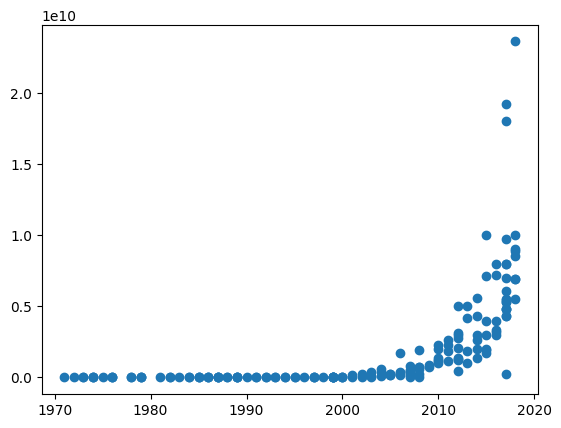

In [ ]:
plt.scatter(data['year'], data['number'])

In [ ]:
data['number'] = data['number'].apply(np.log)

In [ ]:
X = data.year
y = data.number

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(1),
    # tf.keras.layers.Dense(3),
    # tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50 :
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
fit = model.fit(X, y, epochs=100, callbacks= [scheduler])

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 340.5199 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 295.6808 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 245.0760 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 204.9480 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 162.1566 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 134.4909 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 128.5429 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 111.7491 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 66.5335 - lr: 0.0010
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 40.3994 - lr: 0.0010
Epoch 11/100
6/6 [==============================] - 0s 4ms/step - loss:

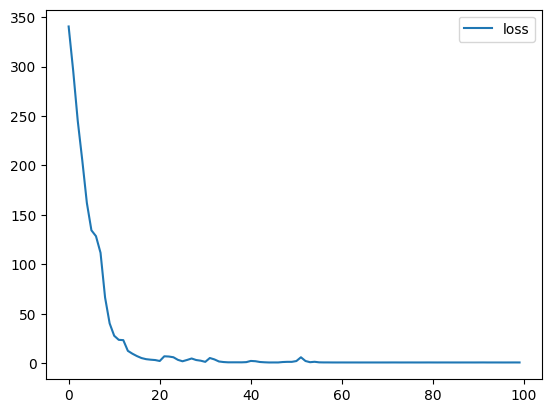

In [ ]:
plt.plot(fit.history['loss'], label='loss')
plt.legend()